In [ ]:
!pip install datacleaner > tempor.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_columns = 100
import datacleaner as dc

In [ ]:
df = pd.read_csv('onlinedeliverydata.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [ ]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [ ]:
df.isna().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [ ]:
#Count distinct values of categorical columns
print(df.drop(['Age', 'Family size', 'latitude', 'longitude',
                 'Pin code', 'Reviews'], axis=1).apply(lambda col: col.nunique()))

Gender                                       2
Marital Status                               3
Occupation                                   4
Monthly Income                               5
Educational Qualifications                   5
Medium (P1)                                  4
Medium (P2)                                  3
Meal(P1)                                     4
Meal(P2)                                     3
Perference(P1)                               4
Perference(P2)                               4
Ease and convenient                          5
Time saving                                  5
More restaurant choices                      5
Easy Payment option                          5
More Offers and Discount                     5
Good Food quality                            5
Good Tracking system                         5
Self Cooking                                 5
Health Concern                               5
Late Delivery                                5
Poor Hygiene 

In [ ]:
df['Output'].value_counts()

Yes    301
No      87
Name: Output, dtype: int64

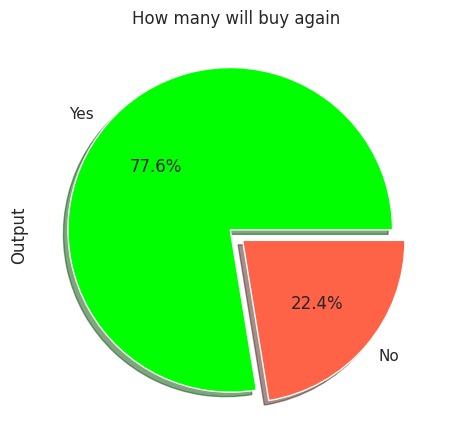

In [ ]:
# How many people will buy again
#autopct displaying percantages
ax = df['Output'].value_counts().plot(kind='pie', title="How many will buy again", autopct='%1.1f%%',shadow=True, colors=['lime', 'tomato'], explode=[0.05,0.05])

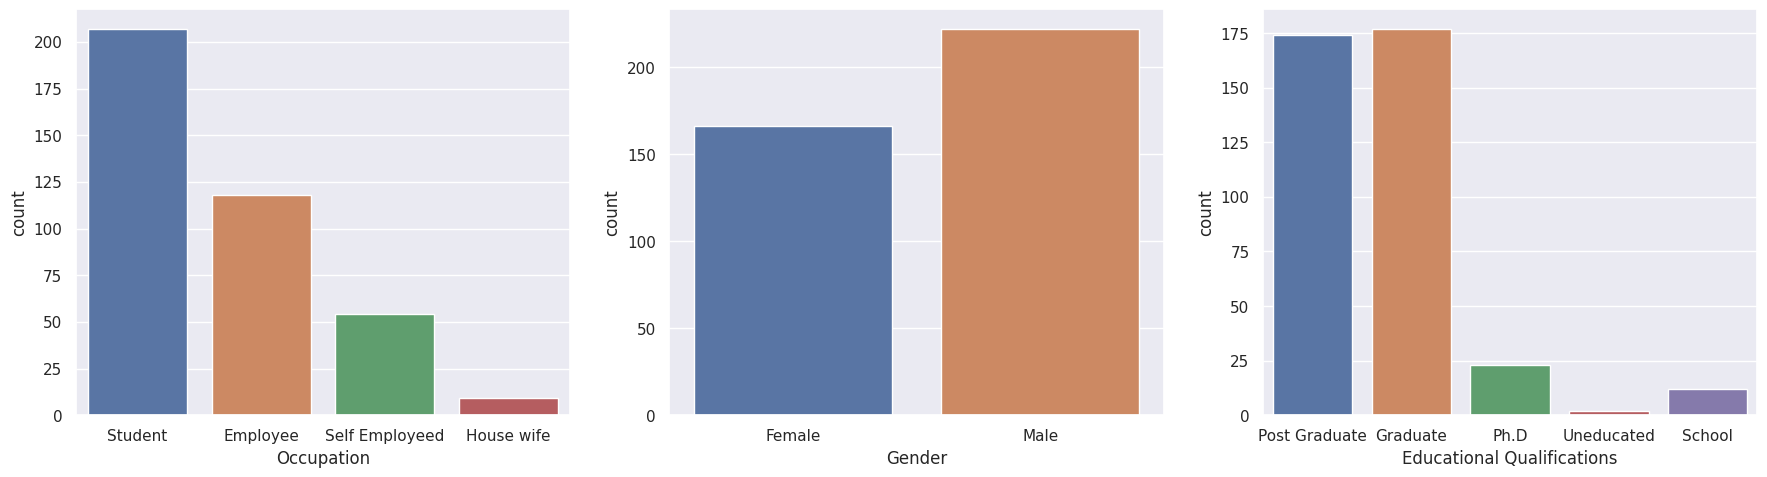

In [ ]:
# plt.figure(figsize=(21.7,5.27))
# plt.subplot(1,3,1)
# df['Occupation'].value_counts().plot(kind = 'bar')
# plt.subplot(1,3,2)
# df['Gender'].value_counts().plot(kind = 'bar')
# plt.subplot(1,3,3)
# df['Educational Qualifications'].value_counts().plot(kind = 'bar')
sns.set(rc={'figure.figsize':(21.7,5.27)})
fig, ax =plt.subplots(1,3)
sns.countplot(x ='Occupation',data=df,ax=ax[0])
sns.countplot(x ='Gender', data = df,ax=ax[1])
sns.countplot(x ='Educational Qualifications',data=df,ax=ax[2])
fig.show()

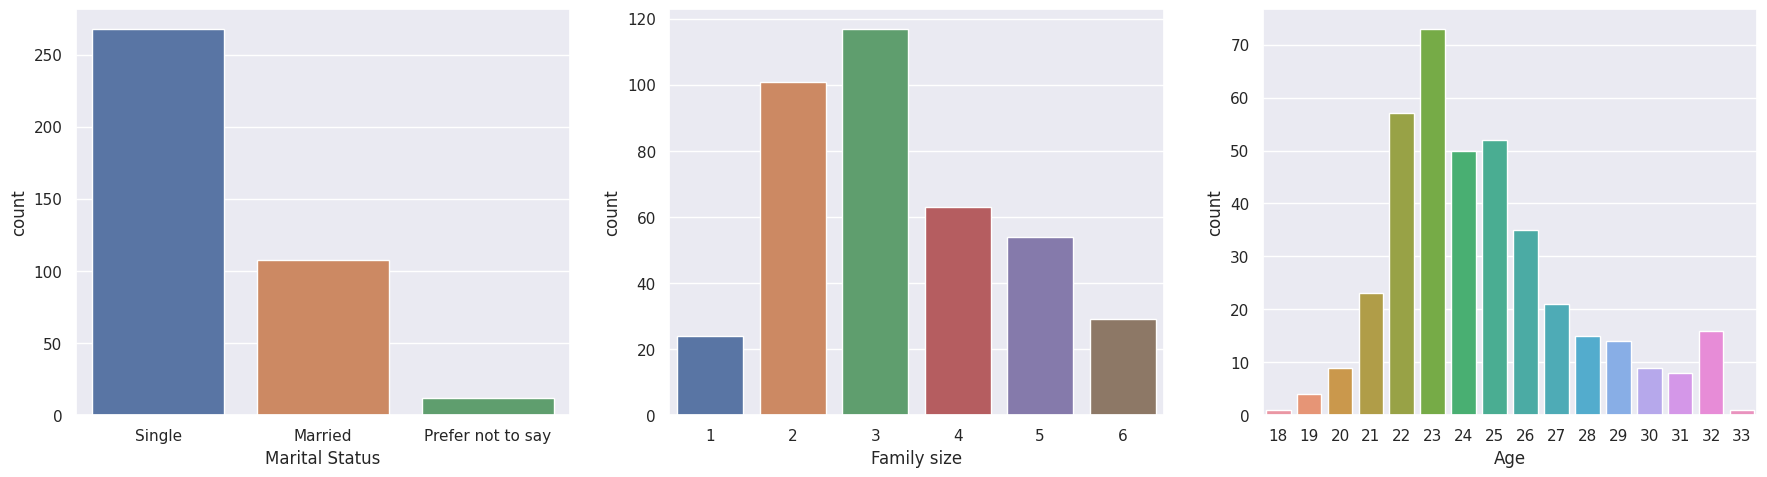

In [ ]:
sns.set(rc={'figure.figsize':(21.7,5.27)})
fig, ax =plt.subplots(1,3)
sns.countplot(x ='Marital Status',data=df,ax=ax[0])
sns.countplot(x ='Family size', data = df,ax=ax[1])
sns.countplot(x ='Age',data=df,ax=ax[2])
fig.show()

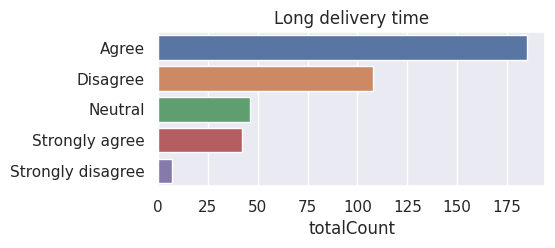

In [ ]:
fig, ax =plt.subplots(figsize=(5,2))
z=sns.barplot(x=df["Long delivery time"].value_counts().values, y=df["Long delivery time"].value_counts().index,data=df,ax=ax)
z.set_xlabel('totalCount')
z.set_title("Long delivery time")
fig.show()

<Axes: xlabel='Monthly Income', ylabel='count'>

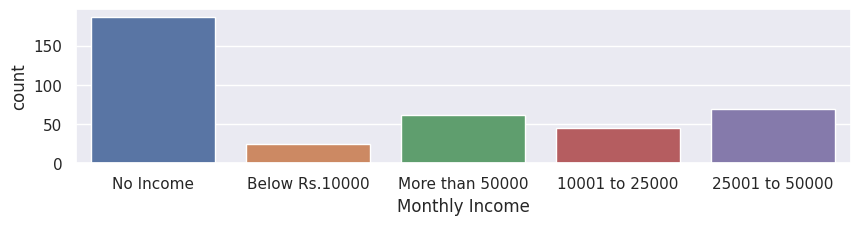

In [ ]:
fig, ax =plt.subplots(figsize=(10,2))
sns.countplot(x ='Monthly Income',data=df,ax=ax)

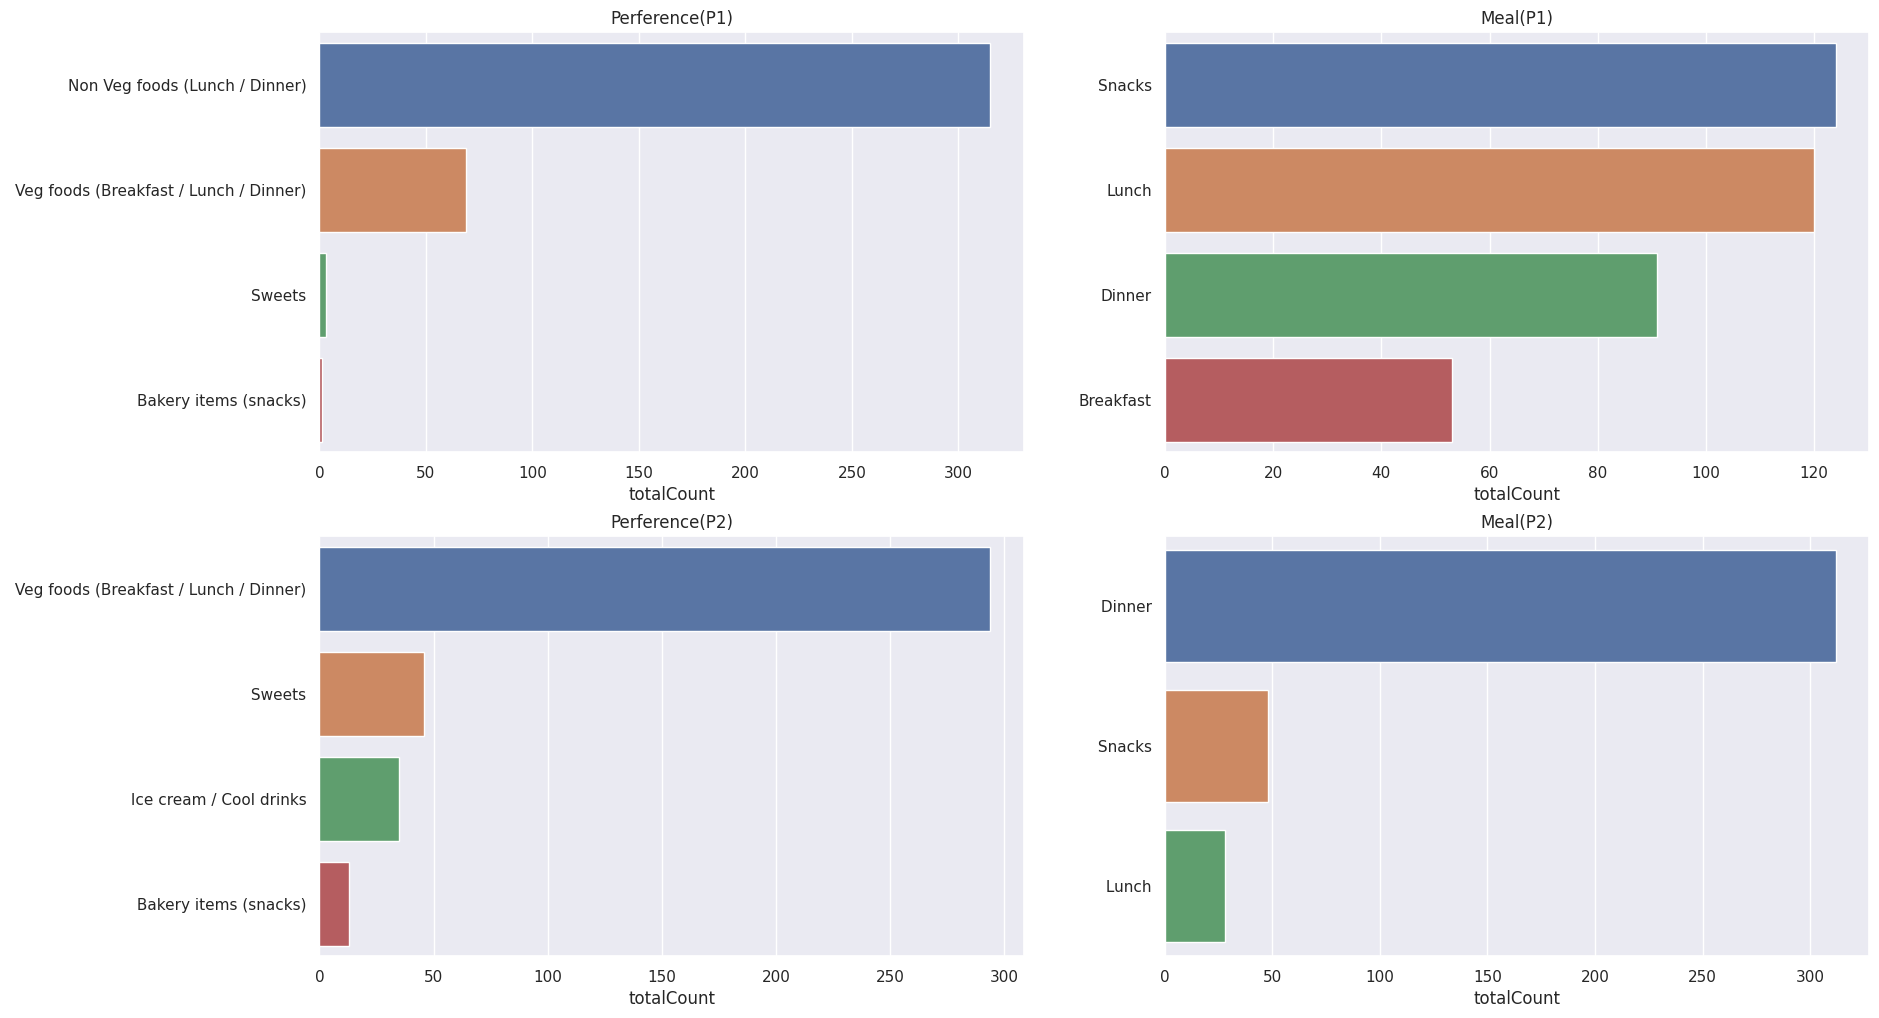

In [ ]:
fig, ax =plt.subplots(2,2,figsize=(20,12))
z=sns.barplot(x=df["Meal(P1)"].value_counts().values, y=df["Meal(P1)"].value_counts().index,data=df,ax=ax[0][1])
z.set_xlabel('totalCount')
z.set_title("Meal(P1)")
z=sns.barplot(x=df["Meal(P2)"].value_counts().values, y=df["Meal(P2)"].value_counts().index,data=df,ax=ax[1][1])
z.set_xlabel('totalCount')
z.set_title("Meal(P2)")

z.set_xlabel('totalCount')
z=sns.barplot(x=df["Perference(P1)"].value_counts().values, y=df["Perference(P1)"].value_counts().index,data=df,ax=ax[0][0])
z.set_xlabel('totalCount')
z.set_title("Perference(P1)")
z=sns.barplot(x=df["Perference(P2)"].value_counts().values, y=df["Perference(P2)"].value_counts().index,data=df,ax=ax[1][0])

z.set_xlabel('totalCount')
z.set_title("Perference(P2)")
fig.show()

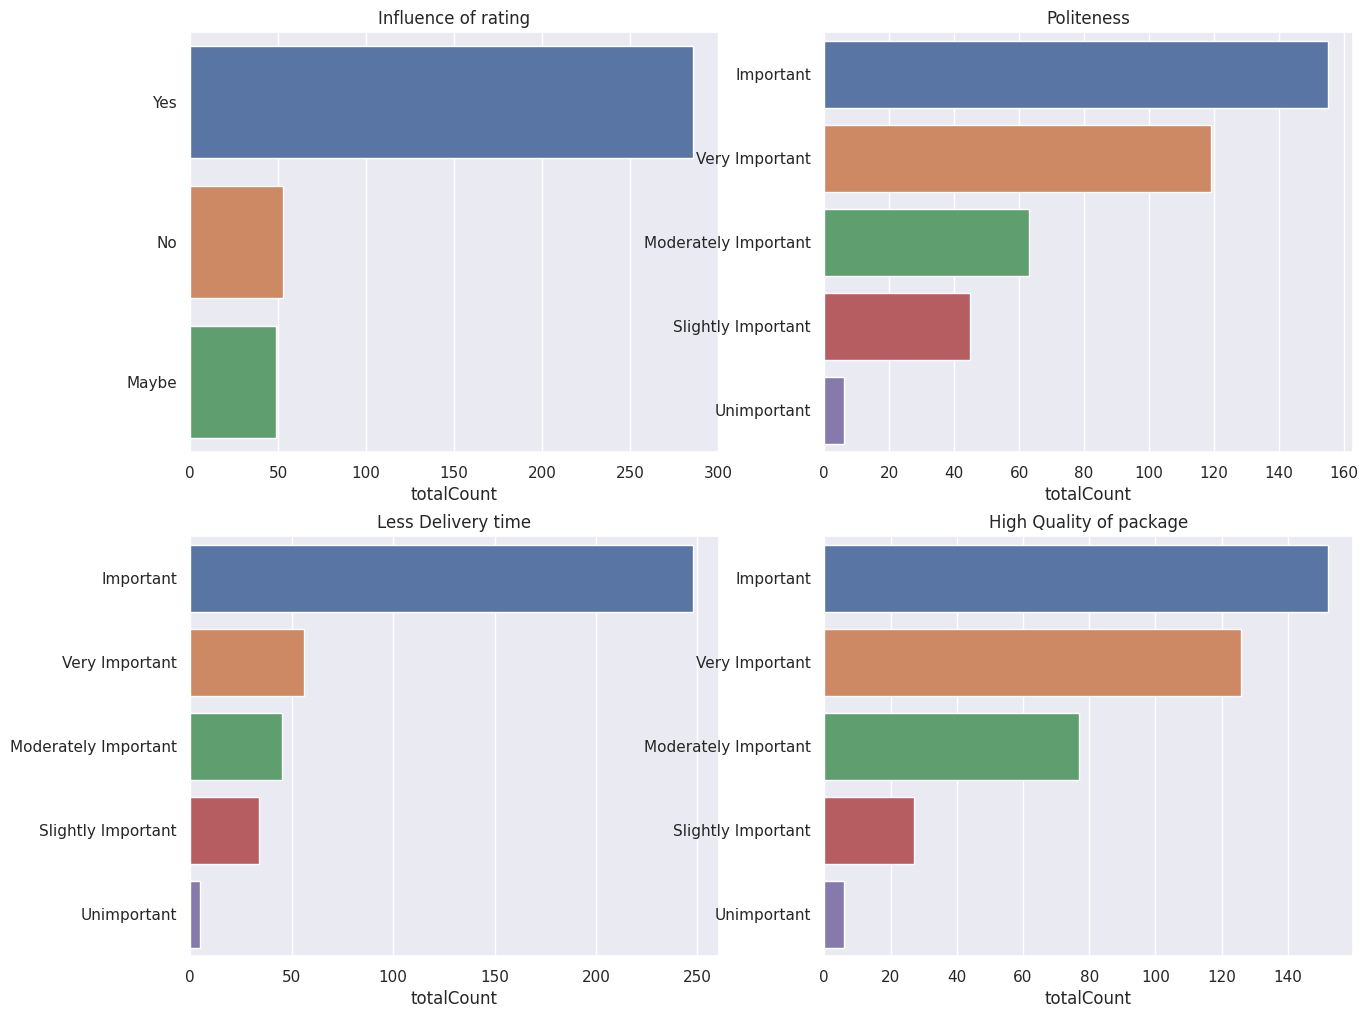

In [ ]:
fig, ax =plt.subplots(2,2,figsize=(15,12))

z=sns.barplot(x=df["Influence of rating"].value_counts().values, y=df["Influence of rating"].value_counts().index,data=df,ax=ax[0][0])
z.set_xlabel('totalCount')
z.set_title("Influence of rating")
z=sns.barplot(x=df["Politeness"].value_counts().values, y=df["Politeness"].value_counts().index,data=df,ax=ax[0][1])
z.set_xlabel('totalCount')
z.set_title("Politeness")

z.set_xlabel('totalCount')
z=sns.barplot(x=df["Less Delivery time"].value_counts().values, y=df["Less Delivery time"].value_counts().index,data=df,ax=ax[1][0])
z.set_xlabel('totalCount')
z.set_title("Less Delivery time")
z=sns.barplot(x=df["High Quality of package"].value_counts().values, y=df["High Quality of package"].value_counts().index,data=df,ax=ax[1][1])

z.set_xlabel('totalCount')
z.set_title("High Quality of package")
fig.show()

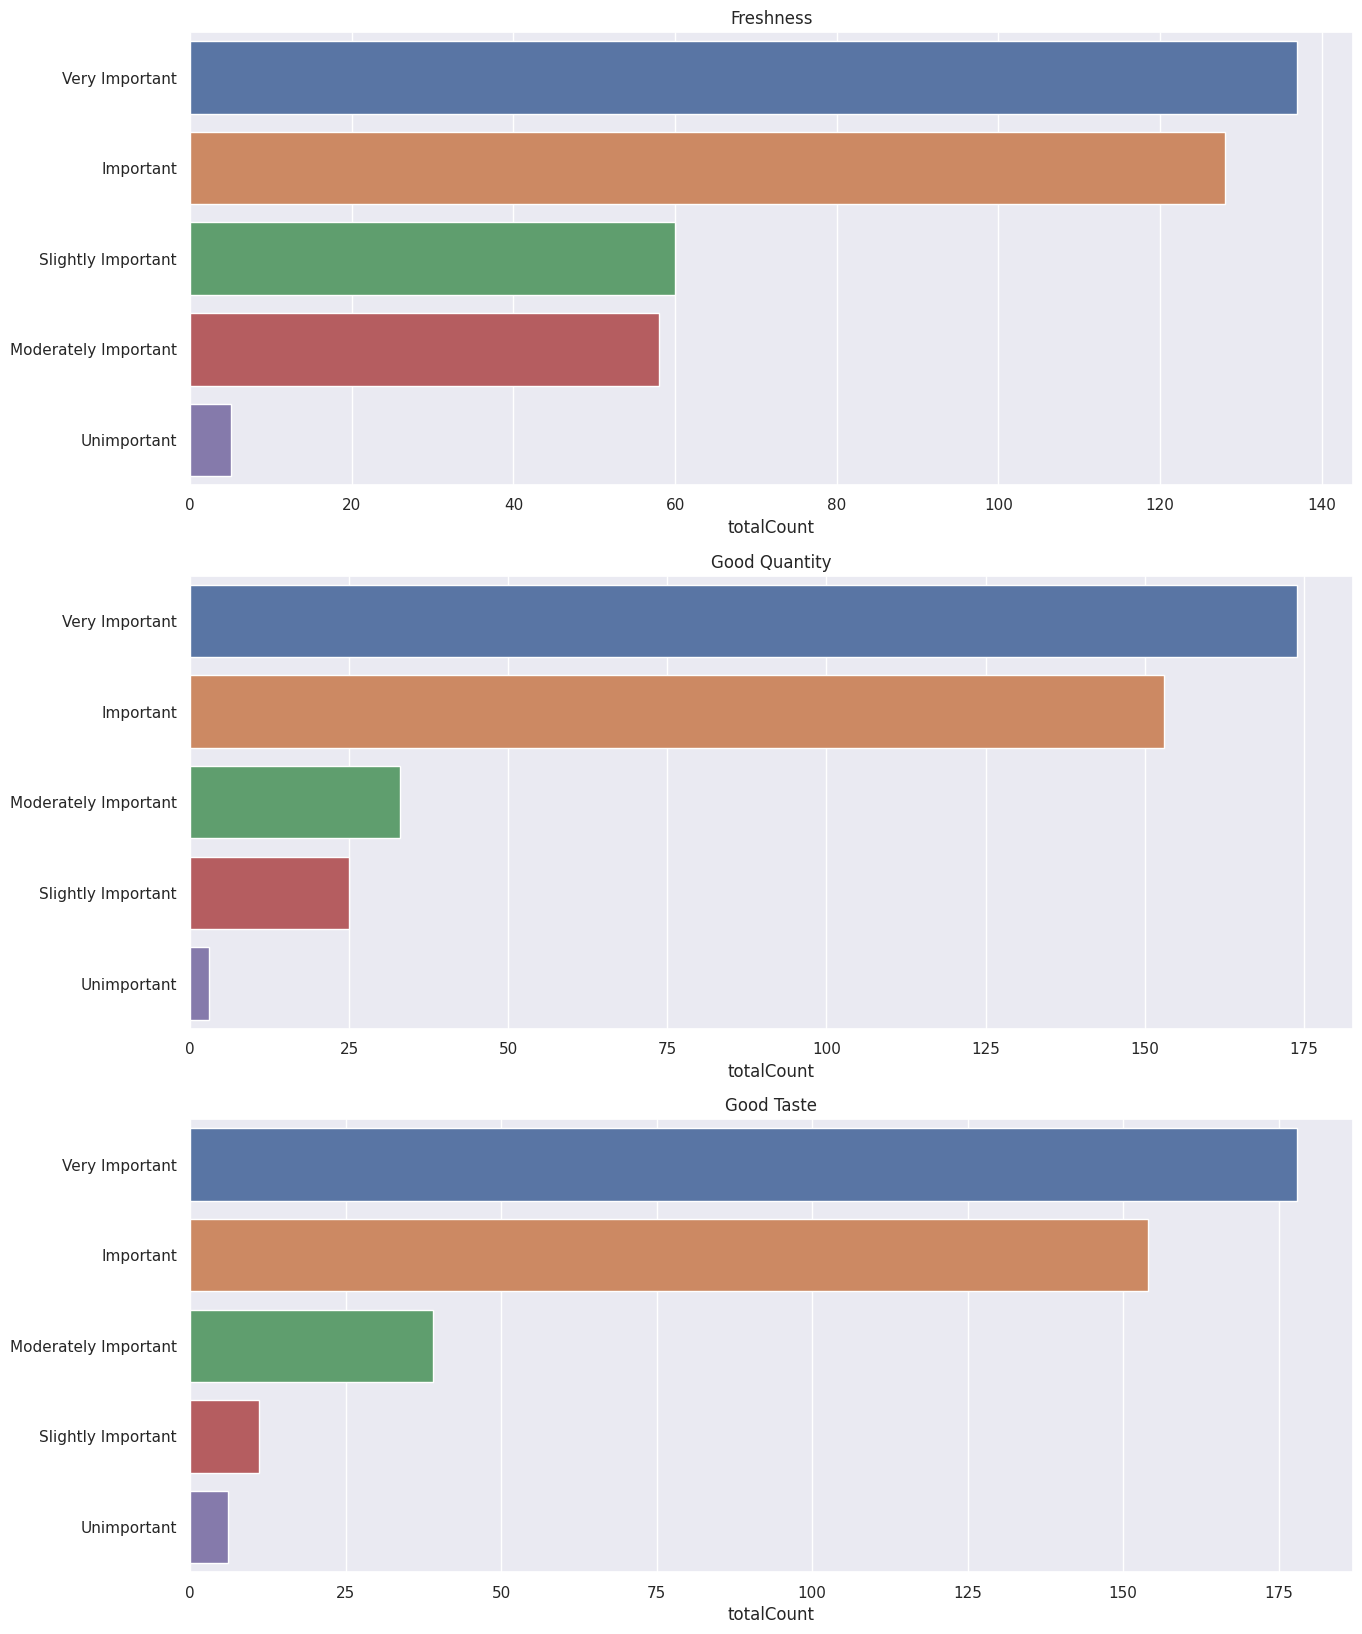

In [ ]:
fig, ax =plt.subplots(3,1,figsize=(15,20))

z=sns.barplot(x=df["Freshness "].value_counts().values, y=df["Freshness "].value_counts().index,data=df,ax=ax[0])
z.set_xlabel('totalCount')
z.set_title("Freshness")
z=sns.barplot(x=df["Good Quantity"].value_counts().values, y=df["Good Quantity"].value_counts().index,data=df,ax=ax[1])
z.set_xlabel('totalCount')
z.set_title("Good Quantity")

z.set_xlabel('totalCount')
z=sns.barplot(x=df["Good Taste "].value_counts().values, y=df["Good Taste "].value_counts().index,data=df,ax=ax[2])
z.set_xlabel('totalCount')
z.set_title("Good Taste")
fig.show()

##Preprocessing

In [ ]:
cleaned_data = dc.autoclean(df.copy())
cleaned_data.drop(['latitude', 'longitude', 'Pin code', 'Reviews'], axis=1, inplace=True)
cleaned_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,1,2,0,1,1,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,2,2,1,0,2,2,2,2,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,1,2,3,0,1,3,3,3,3,3,3,2,0,3,3,0,3,3,3,3,3,3,3,3,3,3,2,0,1,3,2,1,4,0,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,2,3,1,0,2,2,1,1,3,3,3,2,2,1,2,1,2,2,0,0,0,0,0,0,0,3,0,2,2,0,2,0,3,2,2,0,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,0,6,1,1,3,0,3,0,0,0,3,0,3,0,0,0,3,2,0,1,1,2,0,0,0,1,1,2,2,0,1,1,0,0,2,0,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,2,4,2,0,2,0,1,3,0,0,0,0,0,2,2,0,3,3,0,3,0,1,3,3,2,2,2,1,2,2,1,0,0,0,0,0,2,0,0,1,0,0,0,4,4,1


In [ ]:
colon = cleaned_data.columns[:-1].tolist()
list_corr = []
for i in colon:
  cor = cleaned_data[i].corr(cleaned_data['Output'])
  list_corr.append(cor)
data_corr = pd.DataFrame(list(zip(colon, list_corr)), columns=['Attributes','Churn_corr']).set_index('Attributes')
data_corr_pos = data_corr[data_corr['Churn_corr']>=0].sort_values('Churn_corr', ascending=False)
data_corr_neg = data_corr[data_corr['Churn_corr']<0].sort_values('Churn_corr')

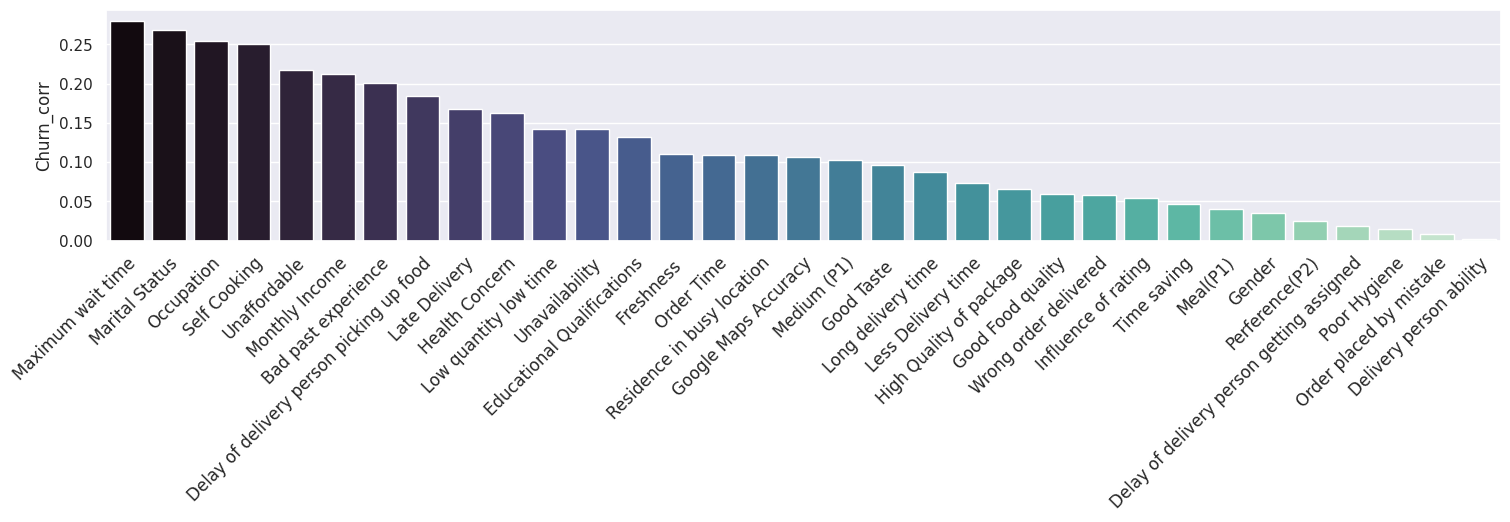

In [ ]:
#Plot positive correlations
plt.figure(figsize=(18,3))
sns.barplot(x=data_corr_pos.index, y=data_corr_pos.Churn_corr, data=data_corr, palette="mako")
plt.xlabel(None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize = 12);

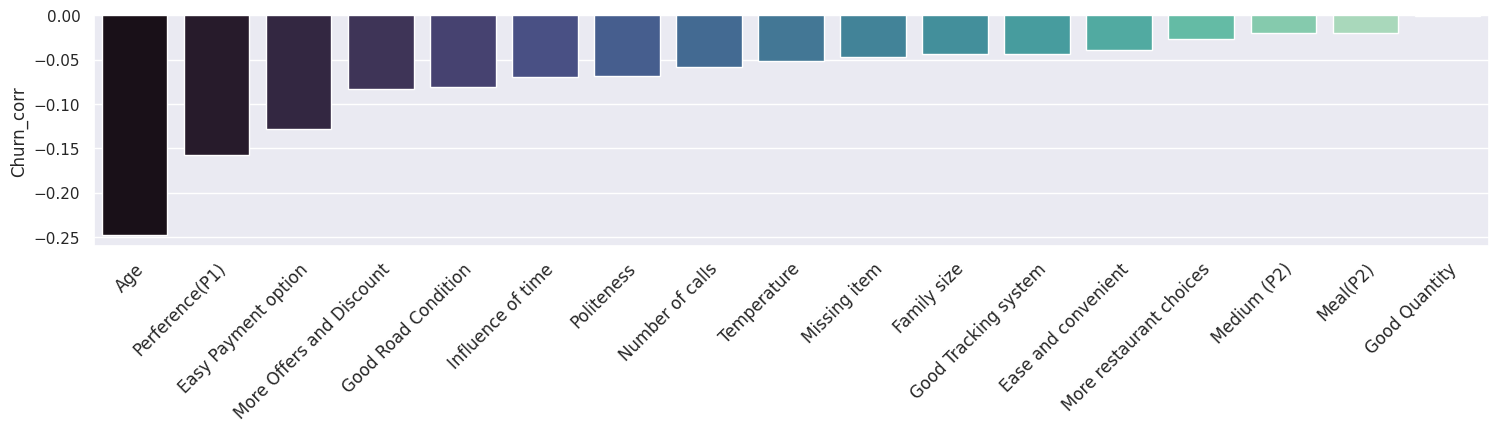

In [ ]:
#Plot negative correlations
plt.figure(figsize=(18,3))
sns.barplot(x=data_corr_neg.index, y=data_corr_neg.Churn_corr, data=data_corr, palette="mako")
plt.xlabel(None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize = 12);

In [ ]:
dataset = cleaned_data.copy()
# dataset.drop(['latitude', 'longitude', 'Pin code', 'Reviews'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

In [ ]:
X = dataset.drop(["Output"],axis=1)
y = dataset["Output"]

sc = StandardScaler()
X[X.columns[:]] = sc.fit_transform(X[X.columns[:]])
X.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity
0,-1.557620,-1.156438,0.657391,0.826756,0.863220,0.899506,0.532929,-0.190330,1.707278,-1.755597,0.99794,-0.469176,-3.299095,0.932746,0.431013,0.469411,0.374552,0.362232,0.462750,0.359290,1.045561,0.587189,0.602250,0.483120,0.551862,0.300026,0.162200,-0.838825,-1.078677,-0.866586,-1.201680,-1.295938,-1.317455,0.5009,1.629122,-0.651663,-0.601370,0.340991,0.589421,0.629174,0.571439,0.555797,0.064509,-0.395685,-0.395023,-0.392524,-0.535526,-0.387513,-0.552263,-0.553993
1,-0.211614,-1.156438,0.657391,0.826756,-0.479182,-1.034058,-0.208205,-0.190330,1.707278,1.151252,-0.46873,-0.469176,0.506799,1.746017,1.194634,1.200863,1.112250,1.113816,0.462750,-1.063206,2.004609,1.437298,-0.940146,1.305272,1.408351,1.032166,0.885573,1.919345,1.354617,1.575802,1.061678,1.017669,0.791923,0.5009,-0.648713,-0.651663,2.143707,0.340991,-0.188454,2.199076,-1.017940,0.555797,2.150303,1.342343,1.512889,1.371560,1.230344,1.360802,1.042858,1.058127
2,-0.884617,0.864724,0.657391,0.826756,-0.479182,0.899506,-0.208205,-0.190330,-0.840506,0.182302,2.46461,-0.469176,-2.030464,1.746017,1.194634,1.200863,0.374552,0.362232,-0.328206,0.359290,0.086512,0.587189,0.602250,-1.161184,-1.161117,-1.164252,-1.284547,-0.838825,-1.078677,-0.866586,1.061678,-1.295938,0.088797,0.5009,-0.648713,0.380358,-0.601370,1.110202,0.589421,0.629174,-1.017940,0.555797,-0.630755,1.342343,-0.395023,1.371560,1.230344,-0.970285,1.042858,-0.553993
3,-0.884617,-1.156438,0.657391,0.826756,0.863220,-1.034058,2.015198,-0.190330,0.433386,1.151252,-0.46873,2.131398,-3.299095,-0.693795,-1.096229,1.200863,-1.100842,1.113816,-1.119162,-1.063206,-0.872536,1.437298,0.602250,-1.161184,-0.304628,-0.432113,0.162200,-0.838825,-1.078677,-0.866586,-0.447227,-0.524736,0.088797,0.5009,-0.648713,-0.651663,0.313656,-1.197433,-0.966330,0.629174,-1.017940,0.555797,2.150303,-0.975028,-0.395023,1.371560,1.230344,1.360802,1.042858,-1.091367
4,-0.884617,0.864724,0.657391,0.826756,-0.479182,0.899506,0.532929,3.020451,-0.840506,0.182302,-0.46873,-0.469176,0.506799,-0.693795,-1.096229,-0.993493,-1.100842,-1.140935,0.462750,0.359290,-0.872536,1.437298,1.373448,-1.161184,1.408351,-1.164252,-0.561174,1.919345,1.354617,0.761673,0.307226,0.246467,-0.614329,0.5009,1.629122,-0.651663,-0.601370,-1.197433,-0.966330,-0.940727,-1.017940,0.555797,-0.630755,-0.975028,-0.395023,-0.980552,-1.124149,-0.970285,1.042858,1.058127


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y ,test_size  = 0.25, random_state=0, stratify=dataset.Output)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_x.shape, test_x.shape))

Train dataset shape: (291, 50), 
Test dataset shape: (97, 50)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=3, p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(train_x, train_y)
knn_pred = knnmodel.predict(test_x)
knn_accuracy = metrics.accuracy_score(test_y, knn_pred) * 100
knn_accuracy

85.56701030927834

In [ ]:
doknn(1)

[(0.45293282306785093, 1),
 (51.62523351725123, 0),
 (53.00181998346938, 0),
 (53.00181998346938, 0),
 (56.82566705405474, 1),
 (57.084558228957896, 0),
 (57.92103103472327, 0),
 (57.92103103472327, 0),
 (58.058957484640466, 1),
 (59.61227422017785, 1),
 (61.26147420239769, 0),
 (61.8911332474392, 0),
 (63.307474362437574, 1),
 (63.49415136145467, 1),
 (64.35164563866408, 1),
 (64.35164563866408, 1),
 (65.5014903280524, 0),
 (65.85081810104872, 1),
 (67.55113097612329, 1),
 (68.14898763075102, 1),
 (68.3628548395428, 0),
 (68.37854779082721, 1),
 (69.30330387497999, 0),
 (70.24487802712565, 1),
 (70.37476640590296, 0),
 (71.64694217667598, 1),
 (72.66783175666716, 1),
 (72.66783175666716, 1),
 (72.66783175666716, 1),
 (72.91018814581258, 0),
 (73.2165819075517, 1),
 (73.4393809439747, 1),
 (73.4393809439747, 1),
 (73.60109893185684, 1),
 (73.60109893185684, 1),
 (73.60109893185684, 1),
 (74.17649985617633, 1),
 (74.17649985617633, 1),
 (74.19932834142283, 1),
 (74.19932834142283, 1),
 

In [ ]:
def doknn(row):
  dist = 0
  n = train_x.shape[0]
  ans = [0] * n
  ty = train_y.copy()
  ty = ty.reset_index(drop=True)
  colu = train_x.columns.to_list()
  for r in range(train_x.shape[0]):
    for col in range(train_x.shape[1]):
      t = train_x[colu[col]].values[r] - test_x[colu[col]].values[row]
      ans[r] += t * t
  retval = [(ans[i], ty[i]) for i in range(n)]
  retval = sorted(retval)
  return retval

def findaccKnn(k):
  n = test_x.shape[0]
  ty = test_y.reset_index(drop=True)
  correctans = 0
  for i in range(n):
    dist = doknn(i)
    count1 = 0
    for _ in range(k):
      count1 += dist[_][1]
    if (count1 > k - count1):
      ans = 1
    else:
      ans = 0
    if (ans == ty[i]):
      correctans+=1
  print(correctans * 100 / n)

In [ ]:
findaccKnn(3)

85.56701030927834


In [ ]:
#LOGISTIC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_log = LogisticRegression()

# Train the model

model_log.fit(train_x, train_y)

# Make predictions on the test set
y_pred = model_log.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 86.5979381443299


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier(random_state=0)

# Train the model

model_DT.fit(train_x, train_y)

# Make predictions on the test set
y_pred = model_DT.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9175257731958762
